In [1]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn.pool import knn_graph
import random

In [2]:
num_nodes = 5
num_node_features = 10
x = torch.randn(num_nodes, num_node_features)
print(x)

tensor([[ 0.0431,  0.4018, -0.2852,  0.5245, -0.8299,  2.1720, -1.1246, -1.1298,
          0.1497, -0.3644],
        [-2.1516, -1.1698,  0.2321,  1.3582, -1.6424,  1.0983,  1.0036,  0.7838,
         -0.8078, -0.2821],
        [ 0.1954, -0.2114,  0.7121, -1.5373,  0.0194,  0.5222,  1.0667, -0.8864,
          0.7094,  1.0767],
        [-0.0492, -1.8754, -0.6015,  1.6571, -1.5406,  0.8120, -0.4853, -0.4960,
          0.4934, -2.3923],
        [ 0.2361, -0.1554,  0.1785,  0.5096,  1.6501, -0.4125, -0.0523,  0.3316,
          0.6468, -0.3803]])


In [3]:
pos = torch.randn(num_nodes, 2)
print(pos)

tensor([[-0.2451,  0.3019],
        [-0.9627, -0.9223],
        [-0.5598, -0.6906],
        [ 0.6714,  0.8701],
        [-0.9068, -1.4321]])


In [4]:
edge_index = knn_graph(pos, k=4, loop=False)

In [5]:
y = x.sum(dim=1).mean().unsqueeze(0)

data = Data(x=x, edge_index=edge_index, pos=pos, y=y)

In [6]:
print(data.pos)

tensor([[-0.2451,  0.3019],
        [-0.9627, -0.9223],
        [-0.5598, -0.6906],
        [ 0.6714,  0.8701],
        [-0.9068, -1.4321]])


### visualizing geometric data object as a networkx graph

In [7]:
import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

In [8]:
G = to_networkx(data,to_undirected=True,node_attrs=['x'],edge_attrs=None)

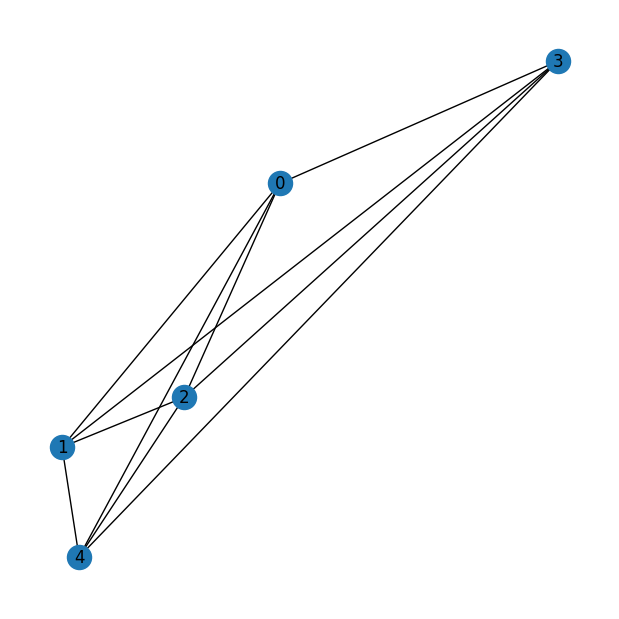

In [9]:
# the position helps to visualize the true graph. If pos is not passed to nx.draw, we lose information on 
# the position of the nodes (see the cell below this)
pos = {i: data.pos[i].tolist() for i in range(data.num_nodes)}

plt.figure(figsize=(6, 6))
nx.draw(G,pos,node_size=300,with_labels=True)
plt.show()

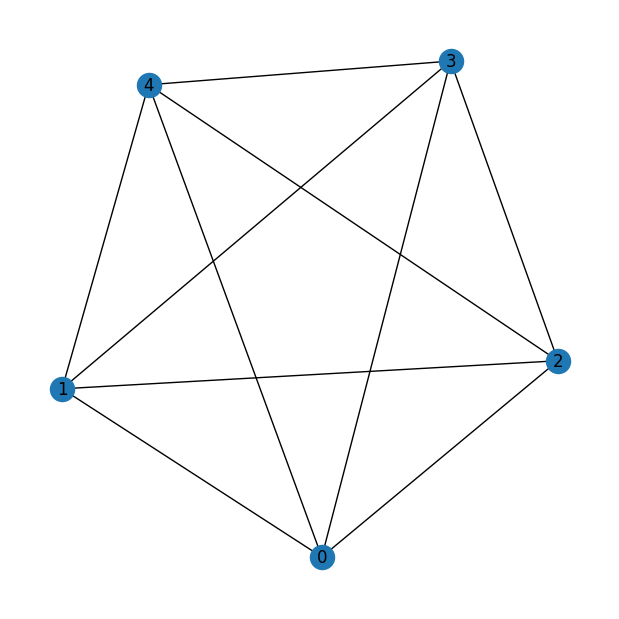

In [10]:
# this will give a neat graph 
plt.figure(figsize=(6, 6))
nx.draw(G,node_size=300,with_labels=True)
plt.show()

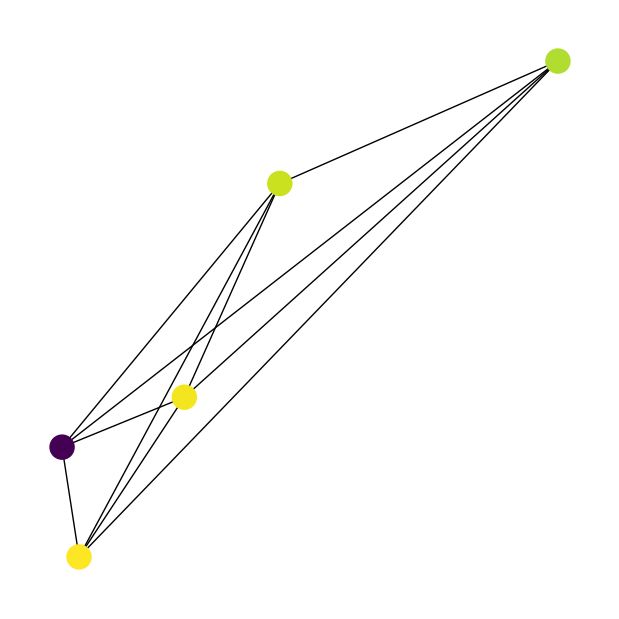

In [11]:
node_colors = data.x[:, 0].numpy()

plt.figure(figsize=(6, 6))
nx.draw(G,pos,node_color=node_colors,node_size=300,with_labels=False)
# plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
plt.show()


In [12]:
def create_random_graph(min_nodes=5, max_nodes=30, num_node_features=10, k=4):
    num_nodes = random.randint(min_nodes, max_nodes)

    x = torch.randn(num_nodes, num_node_features)

    pos = torch.randn(num_nodes, 2)

    edge_index = knn_graph(pos, k=k, loop=False)

    y = x.sum(dim=1).mean().unsqueeze(0)

    return Data(
        x=x,
        edge_index=edge_index,
        pos=pos,
        y=y
    )

In [13]:
def create_dataset(num_graphs=1000):
    dataset = []
    for _ in range(num_graphs):
        graph = create_random_graph()
        dataset.append(graph)
    return dataset

In [14]:
dataset = create_dataset(300)

In [15]:
print()
# print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset[0].x.shape[1]}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Number of graphs: 300
Number of features: 10

Data(x=[30, 10], edge_index=[2, 120], y=[1], pos=[30, 2])
Number of nodes: 30
Number of edges: 120
Average node degree: 4.00
Has isolated nodes: False
Has self-loops: False
Is undirected: False


In [16]:
def plot_geometric_data_as_graph(data):
    G = to_networkx(data, to_undirected=True, node_attrs=['x'], edge_attrs=None)
    pos = {i: data.pos[i].tolist() for i in range(data.num_nodes)}
    fig = plt.figure(figsize=(6, 6))
    nx.draw(G,pos,node_size=300,with_labels=False)
    plt.show()
    fig.clear()

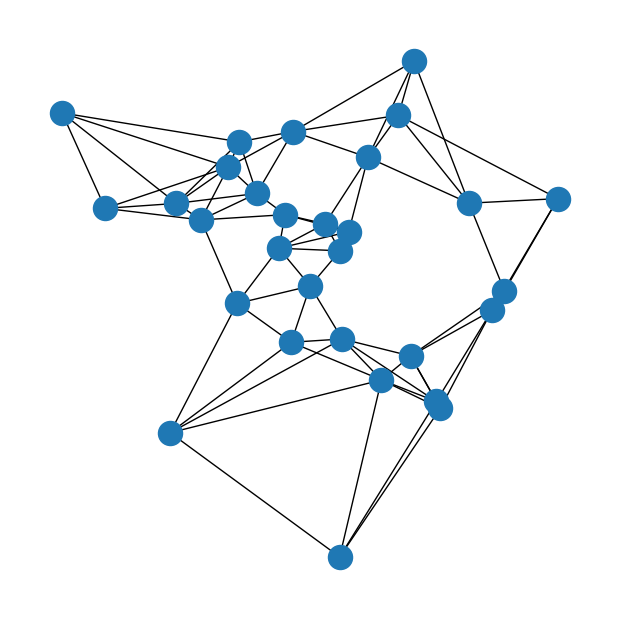

In [17]:
plot_geometric_data_as_graph(dataset[10])

### Splitting the dataset in to train and test dataset

In [18]:
train_dataset = dataset[:200]
val_dataset = dataset[200:260]
test_dataset = dataset[260:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of validation graphs: {len(val_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 200
Number of validation graphs: 60
Number of test graphs: 40


In [25]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 64
DataBatch(x=[1116, 10], edge_index=[2, 4464], y=[64], pos=[1116, 2], batch=[1116], ptr=[65])

Step 2:
Number of graphs in the current batch: 64
DataBatch(x=[1108, 10], edge_index=[2, 4432], y=[64], pos=[1108, 2], batch=[1108], ptr=[65])

Step 3:
Number of graphs in the current batch: 64
DataBatch(x=[1082, 10], edge_index=[2, 4328], y=[64], pos=[1082, 2], batch=[1082], ptr=[65])

Step 4:
Number of graphs in the current batch: 8
DataBatch(x=[147, 10], edge_index=[2, 588], y=[8], pos=[147, 2], batch=[147], ptr=[9])



In [57]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool


class GCNRegressor(torch.nn.Module):
    def __init__(self, num_node_features,hidden_channels):
        super(GCNRegressor, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, 1)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.lin(x)
        
        return x

In [85]:
model = GCNRegressor(num_node_features=10,hidden_channels=128)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()

In [86]:
def train():
    model.train()
    mse_total = 0
    loss_total = 0
    for data in train_loader:  # Iterate in batches over the training dataset.
        out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
        loss = criterion(out.squeeze(), data.y)  # Compute the loss.
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
        optimizer.zero_grad() # Clear gradients.
        mse_value = F.mse_loss(out.squeeze(), data.y).detach().item()
        mse_total+=mse_value
        loss_total+=loss.item()
        print(f'{out=}')
        print(f'{data.y}')
    print(mse_total)
    return mse_total / len(train_loader), out, loss_total/len(train_loader)

def test(loader):
    model.eval()
    mse_total = 0
    with torch.no_grad():
        for data in loader:  # Iterate in batches over the training/test dataset.
            out = model(data.x, data.edge_index, data.batch)  
            pred = out  # Use the class with highest probability.
            mse_value = F.mse_loss(out.squeeze(), data.y).detach().item()
            mse_total+=mse_value
    #         print(pred)
    #         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
    return mse_total / len(loader)  # Derive ratio of correct predictions.

In [87]:
train_mse = []
val_mse = []
loss = []
for epoch in range(1, 100):
    train_mse_epoch, out, loss_epoch = train()
    train_mse.append(train_mse_epoch)
    loss.append(loss_epoch)
    
#     train_mse = test(train_loader)
    val_mse_epoch = test(val_loader)
    val_mse.append(val_mse_epoch)
    print(f'Epoch: {epoch:03d}, Loss: {loss_epoch:.4f}, Train MSE: {train_mse_epoch:.4f}, Validation MSE: {val_mse_epoch:.4f}')
#     print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

out=tensor([[ 0.0052],
        [-0.0196],
        [ 0.0067],
        [-0.1043],
        [-0.0352],
        [-0.0118],
        [-0.0321],
        [ 0.0249],
        [ 0.0231],
        [-0.0554],
        [-0.0281],
        [ 0.0490],
        [-0.0536],
        [-0.0221],
        [-0.0456],
        [-0.0187],
        [-0.0171],
        [-0.0616],
        [-0.0492],
        [ 0.0069],
        [-0.0891],
        [-0.0271],
        [-0.1140],
        [-0.0419],
        [-0.0500],
        [-0.1426],
        [-0.0670],
        [-0.0893],
        [ 0.0045],
        [-0.0846],
        [-0.0793],
        [-0.0009],
        [-0.0584],
        [ 0.0061],
        [-0.0702],
        [ 0.0022],
        [-0.0448],
        [-0.0386],
        [-0.0070],
        [-0.0335],
        [ 0.0836],
        [-0.0617],
        [-0.0021],
        [ 0.0044],
        [ 0.0226],
        [ 0.0288],
        [-0.0166],
        [-0.0274],
        [-0.0549],
        [-0.0368],
        [-0.0133],
        [ 0.0039],
        

out=tensor([[-0.1353],
        [-0.0032],
        [-0.0437],
        [ 0.0250],
        [ 0.1519],
        [ 0.1167],
        [ 0.0559],
        [ 0.1212],
        [-0.1218],
        [ 0.0570],
        [ 0.0986],
        [ 0.0073],
        [-0.0759],
        [ 0.0879],
        [-0.0061],
        [ 0.1215],
        [ 0.0857],
        [-0.1218],
        [ 0.0061],
        [-0.1855],
        [ 0.2313],
        [ 0.0846],
        [-0.0184],
        [ 0.0720],
        [ 0.0557],
        [-0.0367],
        [ 0.1077],
        [ 0.1034],
        [-0.0595],
        [ 0.0250],
        [ 0.0276],
        [ 0.1460],
        [ 0.0639],
        [ 0.0735],
        [-0.0117],
        [-0.0856],
        [-0.0891],
        [ 0.0221],
        [ 0.0519],
        [-0.0151],
        [ 0.0563],
        [-0.1400],
        [ 0.0578],
        [ 0.0417],
        [ 0.0345],
        [-0.1231],
        [-0.1459],
        [-0.0782],
        [-0.0595],
        [-0.0401],
        [ 0.0603],
        [ 0.0231],
        

out=tensor([[ 0.1891],
        [-0.2722],
        [-0.3185],
        [ 0.2672],
        [-0.1094],
        [ 0.1805],
        [-0.0472],
        [ 0.1862],
        [ 0.1383],
        [-0.2669],
        [-0.0212],
        [-0.1095],
        [ 0.2079],
        [ 0.1772],
        [ 0.0899],
        [-0.0349],
        [ 0.1269],
        [ 0.3451],
        [-0.2053],
        [ 0.0310],
        [ 0.1249],
        [ 0.2352],
        [ 0.2773],
        [ 0.2060],
        [-0.0640],
        [ 0.0673],
        [ 0.0204],
        [ 0.0895],
        [ 0.0329],
        [-0.2247],
        [-0.0250],
        [ 0.0061],
        [ 0.1677],
        [ 0.0301],
        [-0.1829],
        [-0.0657],
        [ 0.2004],
        [ 0.1844],
        [ 0.0768],
        [ 0.0478],
        [ 0.2658],
        [-0.1062],
        [ 0.0817],
        [ 0.0713],
        [ 0.2151],
        [-0.1362],
        [ 0.0721],
        [-0.3388],
        [ 0.0500],
        [ 0.3443],
        [-0.1631],
        [-0.0781],
        

out=tensor([[ 0.1189],
        [ 0.6569],
        [ 0.0547],
        [ 0.9775],
        [-1.1397],
        [-0.1309],
        [ 0.4233],
        [ 0.2350],
        [ 0.5529],
        [-0.1365],
        [ 0.4670],
        [-0.0557],
        [ 0.2154],
        [ 0.2125],
        [ 0.5014],
        [ 0.4276],
        [-0.0419],
        [-0.8615],
        [-0.2370],
        [-0.2947],
        [ 0.5716],
        [ 0.4726],
        [ 0.0620],
        [ 0.2344],
        [-0.6310],
        [ 0.3132],
        [-0.3367],
        [ 0.4810],
        [ 0.5642],
        [-0.0104],
        [-0.1456],
        [ 0.2181],
        [-0.8432],
        [ 0.0776],
        [ 0.1322],
        [-0.4751],
        [-0.2716],
        [-0.6739],
        [ 0.1771],
        [ 0.2722],
        [ 0.1653],
        [ 0.1435],
        [ 0.4854],
        [-0.0067],
        [-0.3300],
        [-0.2096],
        [ 0.0253],
        [-0.4438],
        [ 0.2787],
        [-0.0081],
        [-0.2962],
        [ 0.0498],
        

tensor([-0.7160, -0.9038,  0.8596, -0.1229, -0.3983, -3.1735, -1.0632,  0.8665])
1.3093775659799576
Epoch: 006, Loss: 0.3273, Train MSE: 0.3273, Validation MSE: 0.2381
out=tensor([[-0.7467],
        [ 0.0530],
        [ 0.4715],
        [-0.2577],
        [-2.1675],
        [ 0.6813],
        [ 0.0228],
        [ 0.9900],
        [-0.4891],
        [-0.1012],
        [-0.5059],
        [-0.2507],
        [ 0.2843],
        [ 0.4469],
        [ 0.6249],
        [ 0.4250],
        [ 0.9030],
        [-0.9234],
        [-0.3398],
        [ 0.5709],
        [-0.2961],
        [ 1.1335],
        [-0.3440],
        [ 0.1777],
        [ 0.3538],
        [ 0.6871],
        [ 0.3099],
        [ 0.7029],
        [ 0.7221],
        [-0.5410],
        [-0.0777],
        [-0.1200],
        [ 0.0888],
        [-0.4176],
        [ 0.2011],
        [ 0.4129],
        [-0.4596],
        [-0.8074],
        [ 0.5481],
        [-0.9959],
        [ 0.5869],
        [ 0.2773],
        [-0.0158],
        [ 0

out=tensor([[ 1.2108],
        [ 0.4313],
        [-0.1754],
        [-0.2102],
        [-0.8200],
        [-0.7270],
        [ 1.8881],
        [ 0.3326],
        [-0.5988],
        [-2.9263],
        [ 1.2650],
        [-0.8256],
        [ 1.1535],
        [ 0.7472],
        [ 0.2671],
        [-0.6506],
        [-0.4432],
        [ 0.9538],
        [-1.3490],
        [ 0.2952],
        [-1.3290],
        [ 1.1758],
        [ 0.1065],
        [-0.8472],
        [ 0.1382],
        [-0.5467],
        [ 0.9191],
        [ 0.2302],
        [-0.3374],
        [-0.0206],
        [-2.9980],
        [-0.4336],
        [ 0.4933],
        [ 0.1364],
        [-1.0510],
        [-0.2559],
        [ 0.5258],
        [ 0.4952],
        [ 0.7895],
        [-0.3771],
        [ 1.5067],
        [-0.7540],
        [ 0.7334],
        [ 0.2520],
        [-0.5111],
        [-1.2390],
        [-1.2065],
        [ 0.2811],
        [ 0.9416],
        [ 1.1293],
        [ 0.2198],
        [ 0.6090],
        

out=tensor([[-0.5861],
        [ 0.4032],
        [-0.6130],
        [ 0.2677],
        [-2.2081],
        [-0.7783],
        [-0.1684],
        [-0.1176],
        [ 0.6876],
        [-0.8783],
        [ 0.5608],
        [ 0.8815],
        [ 0.6960],
        [ 0.7538],
        [-0.1092],
        [ 0.3714],
        [ 0.1701],
        [-0.1875],
        [ 1.3229],
        [-0.9379],
        [ 0.9060],
        [-2.8457],
        [ 0.1664],
        [-1.6654],
        [-0.1208],
        [ 0.7227],
        [-0.0168],
        [-0.9382],
        [ 0.9310],
        [-0.0682],
        [ 0.6239],
        [-0.0481],
        [-0.5415],
        [ 0.1860],
        [ 0.6562],
        [ 0.9942],
        [ 0.4681],
        [ 0.2035],
        [ 0.5377],
        [-0.1958],
        [ 0.2443],
        [ 0.2442],
        [ 1.1597],
        [ 0.0185],
        [ 0.0921],
        [ 0.3303],
        [-0.1711],
        [-0.2484],
        [ 0.9480],
        [-1.7775],
        [-1.1499],
        [-0.9722],
        

out=tensor([[ 0.3140],
        [-0.8921],
        [ 0.3527],
        [ 0.8527],
        [ 0.2745],
        [ 0.2546],
        [-1.5315],
        [-0.7911],
        [-0.5005],
        [ 0.8032],
        [-0.5434],
        [ 0.1594],
        [ 0.0627],
        [ 0.2434],
        [-0.8102],
        [ 0.0091],
        [ 0.6801],
        [-0.1437],
        [ 0.6956],
        [-0.7613],
        [ 0.8277],
        [ 0.5218],
        [-0.8596],
        [ 0.2450],
        [-2.3790],
        [-0.2937],
        [ 0.1811],
        [-0.4194],
        [ 0.2110],
        [ 0.8674],
        [ 0.8751],
        [-0.8119],
        [ 1.0595],
        [-0.5368],
        [-0.2350],
        [-0.0541],
        [-0.3629],
        [ 0.5846],
        [ 0.5829],
        [ 0.7210],
        [-0.4062],
        [-0.6205],
        [ 0.0580],
        [-0.6868],
        [-0.0807],
        [ 0.0719],
        [-0.6384],
        [ 0.8378],
        [ 1.1389],
        [-0.8625],
        [-0.3151],
        [-0.1655],
        

out=tensor([[-0.5204],
        [-0.0299],
        [-1.0026],
        [ 1.0266],
        [-1.0137],
        [ 0.4768],
        [-0.0971],
        [ 0.8983],
        [-0.4829],
        [-1.6065],
        [-1.0333],
        [-0.5491],
        [-0.8236],
        [-0.1283],
        [-0.3492],
        [-0.8240],
        [ 0.4078],
        [ 0.2803],
        [-0.4764],
        [ 0.5273],
        [ 0.6669],
        [ 0.8170],
        [ 0.2466],
        [ 0.1390],
        [ 0.9044],
        [-0.6498],
        [ 0.7596],
        [-0.9779],
        [ 0.2087],
        [ 0.8520],
        [ 0.3801],
        [ 0.5396],
        [-0.4628],
        [ 0.5479],
        [-0.0859],
        [-0.6404],
        [ 0.2784],
        [-0.2324],
        [-0.6312],
        [ 0.5754],
        [-1.0833],
        [-0.1983],
        [-0.8349],
        [-0.8533],
        [-0.8194],
        [-0.5069],
        [-0.4158],
        [-0.0478],
        [-0.4259],
        [ 0.1346],
        [ 0.3162],
        [ 0.4451],
        

out=tensor([[ 2.7918e-02],
        [ 1.1555e+00],
        [ 1.4885e-01],
        [-7.5530e-01],
        [ 6.6192e-01],
        [ 9.0394e-01],
        [-5.7853e-01],
        [-2.5640e+00],
        [-2.6784e+00],
        [ 1.0911e+00],
        [ 2.9041e-01],
        [-8.0436e-02],
        [-2.9449e-01],
        [ 5.7476e-01],
        [-1.1854e-01],
        [ 1.2037e+00],
        [-1.2368e-01],
        [-9.8452e-01],
        [ 7.3638e-01],
        [ 3.2528e-01],
        [ 1.1962e-01],
        [ 9.8043e-01],
        [-1.7124e+00],
        [ 1.1291e+00],
        [ 8.0265e-01],
        [-7.9795e-02],
        [ 2.5808e-01],
        [ 3.9285e-01],
        [-3.2175e-01],
        [ 9.9093e-02],
        [ 1.0698e+00],
        [ 2.5939e-01],
        [-6.2834e-01],
        [-9.3803e-01],
        [ 6.5773e-01],
        [ 1.4130e+00],
        [-1.4054e+00],
        [ 3.9379e-01],
        [-5.9951e-01],
        [ 3.7946e-03],
        [ 7.3562e-01],
        [-3.8008e-01],
        [-5.1525e-01],
       

out=tensor([[ 0.4656],
        [ 1.8501],
        [ 0.6415],
        [-1.1782],
        [ 0.5737],
        [-0.1127],
        [-0.7239],
        [-0.3896],
        [-0.4008],
        [-0.3670],
        [-0.3536],
        [ 1.2085],
        [-0.4098],
        [-0.1868],
        [ 0.3583],
        [ 0.2614],
        [-0.1167],
        [ 0.8056],
        [-0.5277],
        [-0.4967],
        [ 0.2227],
        [ 0.7230],
        [-0.7000],
        [-1.0286],
        [ 0.3378],
        [ 0.0470],
        [ 0.3156],
        [-0.2063],
        [-0.0481],
        [ 0.6395],
        [-0.0363],
        [ 1.0968],
        [-0.0877],
        [ 0.1797],
        [ 0.9157],
        [-1.1686],
        [ 1.3074],
        [-0.6753],
        [-0.0432],
        [ 0.7963],
        [ 0.5129],
        [-0.5586],
        [ 2.1808],
        [-0.5451],
        [ 1.4123],
        [ 1.4688],
        [ 0.7047],
        [ 0.2538],
        [-0.1433],
        [ 0.7101],
        [ 0.8000],
        [-0.5790],
        

out=tensor([[-0.9008],
        [ 0.0505],
        [-0.0778],
        [-0.7481],
        [-0.2330],
        [-0.3588],
        [ 0.8438],
        [ 0.4899],
        [-0.2611],
        [ 0.6601],
        [ 0.0711],
        [ 0.2876],
        [ 0.1578],
        [-0.8215],
        [-0.6013],
        [-0.2477],
        [ 0.3749],
        [ 0.3516],
        [-1.0247],
        [ 0.6991],
        [ 0.0366],
        [-0.6111],
        [ 0.0626],
        [-0.8312],
        [-0.6059],
        [ 1.3442],
        [-0.1154],
        [ 0.4051],
        [ 1.0284],
        [-0.0057],
        [ 0.3036],
        [ 0.0535],
        [ 0.6529],
        [-0.8123],
        [ 0.0632],
        [-0.0432],
        [-0.8192],
        [-1.7650],
        [-2.3393],
        [-0.1178],
        [-0.6839],
        [ 0.4828],
        [ 0.0690],
        [-0.4371],
        [-0.1842],
        [ 0.4476],
        [ 0.6832],
        [ 0.1711],
        [-2.6204],
        [ 0.5331],
        [ 0.5374],
        [ 0.0474],
        

out=tensor([[-0.6086],
        [-0.5748],
        [ 1.0097],
        [-0.3514],
        [ 0.3865],
        [ 0.9508],
        [-0.0534],
        [-0.4900],
        [ 0.5380],
        [-0.0722],
        [ 0.0405],
        [ 0.2147],
        [ 0.2561],
        [ 0.4418],
        [-0.2083],
        [ 1.4969],
        [-0.3387],
        [ 0.5139],
        [ 0.5540],
        [-0.5084],
        [ 0.5169],
        [ 0.1504],
        [-0.7430],
        [-0.9424],
        [ 0.6719],
        [ 0.0302],
        [ 0.1081],
        [-0.3611],
        [-0.2838],
        [ 1.0548],
        [-0.5155],
        [-0.6338],
        [-0.5624],
        [-0.1889],
        [ 1.0103],
        [-0.2344],
        [ 0.6205],
        [ 0.0622],
        [-0.9142],
        [ 1.2758],
        [-0.4764],
        [ 0.8801],
        [-0.6794],
        [-0.5058],
        [ 0.0502],
        [-1.4634],
        [ 0.8388],
        [ 0.0064],
        [-0.0112],
        [-1.0478],
        [ 0.8844],
        [ 0.1049],
        

out=tensor([[-0.0388],
        [ 1.2253],
        [ 1.0959],
        [ 1.4739],
        [ 0.1434],
        [-0.5872],
        [-0.0815],
        [-0.7152],
        [-0.3772],
        [-0.0864],
        [-0.0190],
        [ 0.0028],
        [ 0.7194],
        [ 0.5872],
        [-0.0683],
        [ 0.4165],
        [ 0.8142],
        [ 0.2529],
        [-0.3290],
        [ 1.0937],
        [-1.6516],
        [ 0.2643],
        [ 0.6347],
        [ 0.4122],
        [-0.1458],
        [ 1.0210],
        [-0.0217],
        [-0.7637],
        [-0.2330],
        [ 0.7251],
        [-0.5692],
        [ 0.0739],
        [-1.5454],
        [-0.8058],
        [-0.6154],
        [-0.1552],
        [-0.6808],
        [ 0.7902],
        [ 0.1780],
        [-0.6192],
        [-0.1042],
        [ 1.1467],
        [-0.6351],
        [ 2.5089],
        [ 0.6283],
        [ 1.5797],
        [ 0.3681],
        [ 0.4669],
        [-0.6390],
        [ 0.5354],
        [-0.5232],
        [ 0.1225],
        

out=tensor([[ 3.8704e-02],
        [ 4.0779e-01],
        [-3.7613e-01],
        [-2.5640e-01],
        [ 8.3193e-01],
        [-1.9441e-01],
        [-8.2902e-01],
        [-7.4637e-01],
        [-6.7279e-01],
        [-1.4236e-01],
        [ 1.3891e-03],
        [ 5.3745e-01],
        [-7.3817e-01],
        [ 8.4589e-01],
        [ 2.7605e-01],
        [ 8.9801e-01],
        [ 8.3484e-03],
        [-3.0496e-01],
        [ 9.8769e-01],
        [ 1.1874e-01],
        [ 1.0909e-01],
        [ 1.4149e-02],
        [ 8.5125e-01],
        [ 2.8456e-01],
        [-3.1457e-01],
        [ 5.4470e-01],
        [ 3.4865e-01],
        [ 1.8826e-01],
        [-1.5497e-01],
        [-5.7880e-01],
        [ 5.6949e-02],
        [-6.0164e-03],
        [-6.3236e-01],
        [-7.4447e-01],
        [ 6.4564e-01],
        [ 4.7581e-01],
        [-2.7953e+00],
        [ 8.5226e-01],
        [-4.6243e-01],
        [ 5.1502e-01],
        [ 1.6683e-01],
        [-6.3104e-01],
        [ 5.4546e-01],
       

out=tensor([[ 0.6059],
        [ 1.7815],
        [-0.5147],
        [-0.6187],
        [-0.0037],
        [ 0.6780],
        [ 0.1154],
        [ 0.0423],
        [ 0.1093],
        [ 0.7951],
        [-0.8715],
        [-0.0404],
        [ 0.3246],
        [-0.7924],
        [ 0.1620],
        [-0.0151],
        [ 0.9337],
        [-0.0056],
        [ 0.4336],
        [ 1.1977],
        [ 0.6331],
        [-0.6236],
        [ 0.9265],
        [ 0.0578],
        [ 0.6416],
        [-0.3972],
        [ 0.7409],
        [-0.1895],
        [-0.0574],
        [ 0.8814],
        [ 0.1437],
        [ 0.4310],
        [ 0.1709],
        [-0.7051],
        [ 0.4924],
        [-0.6835],
        [-1.4776],
        [ 1.0801],
        [-2.7152],
        [ 0.0361],
        [ 0.7020],
        [-0.1898],
        [ 0.5310],
        [-0.5979],
        [-0.0414],
        [-0.7665],
        [ 1.1396],
        [ 0.8078],
        [-0.9886],
        [-0.9876],
        [-0.8249],
        [ 0.1028],
        

out=tensor([[-0.2545],
        [-0.0176],
        [-0.4426],
        [ 0.6838],
        [-2.1052],
        [-0.6666],
        [ 0.0430],
        [ 0.4749],
        [-1.7799],
        [-0.7938],
        [-0.3802],
        [ 0.5315],
        [ 0.8584],
        [-0.0063],
        [-0.7607],
        [ 0.1052],
        [ 0.4693],
        [-0.1093],
        [ 1.0913],
        [-0.5453],
        [ 1.2951],
        [ 0.2482],
        [-0.5152],
        [ 0.5954],
        [-0.1192],
        [-0.7056],
        [ 0.6304],
        [ 0.2067],
        [ 1.0748],
        [ 1.2771],
        [-0.8048],
        [-1.7795],
        [ 0.8624],
        [ 1.8406],
        [ 0.7429],
        [-0.2359],
        [ 0.6945],
        [ 0.5244],
        [ 0.6276],
        [-0.5152],
        [ 0.3874],
        [-1.1824],
        [ 0.9164],
        [-1.5894],
        [-0.4812],
        [ 1.0920],
        [ 0.8919],
        [-0.6216],
        [ 0.6582],
        [-0.5959],
        [-1.3828],
        [ 0.9106],
        

out=tensor([[ 6.4585e-01],
        [ 8.1051e-01],
        [ 6.8461e-01],
        [ 3.2826e-02],
        [ 1.0975e+00],
        [ 6.5732e-01],
        [-9.9138e-01],
        [ 1.8735e-02],
        [-1.2279e+00],
        [-5.6974e-01],
        [ 6.3354e-01],
        [-3.7654e-01],
        [ 8.3684e-02],
        [-5.2760e-01],
        [ 8.8269e-01],
        [ 6.2498e-01],
        [ 4.5755e-01],
        [-8.5308e-01],
        [-6.4899e-01],
        [ 4.2042e-01],
        [ 5.9258e-01],
        [ 2.1529e-01],
        [ 1.9550e-03],
        [-5.2784e-02],
        [ 8.7004e-01],
        [-5.9617e-01],
        [-2.4276e-01],
        [-3.5600e-01],
        [-7.9505e-01],
        [-8.4616e-01],
        [-9.8151e-01],
        [-1.2627e+00],
        [ 2.4814e-01],
        [ 1.1544e+00],
        [ 3.6764e-01],
        [ 4.8224e-01],
        [ 5.4964e-01],
        [-2.0690e-01],
        [ 1.5158e-01],
        [ 2.3410e-01],
        [-9.6576e-01],
        [ 8.0071e-02],
        [-1.1224e-01],
       

out=tensor([[-0.0836],
        [-2.3935],
        [-0.1429],
        [-0.5743],
        [-0.5489],
        [ 0.6656],
        [ 0.1908],
        [ 0.2626],
        [-0.3845],
        [ 1.0090],
        [-0.6930],
        [ 0.5621],
        [-1.0905],
        [-0.6779],
        [ 0.0434],
        [ 0.6925],
        [ 0.1301],
        [-0.8393],
        [-1.6585],
        [ 0.3010],
        [-1.0543],
        [ 0.5327],
        [ 0.2999],
        [ 0.0857],
        [ 1.2063],
        [ 0.0081],
        [ 0.4079],
        [-0.8784],
        [-0.0745],
        [-0.9816],
        [ 0.8667],
        [ 0.1555],
        [-0.1446],
        [ 0.6936],
        [-0.7420],
        [ 0.3097],
        [-0.3724],
        [ 0.4975],
        [ 1.1675],
        [ 0.2214],
        [ 0.8705],
        [-0.6507],
        [-0.4825],
        [-0.6913],
        [-0.6990],
        [-0.6731],
        [-0.2694],
        [ 0.7560],
        [-0.7489],
        [-1.7163],
        [ 0.8695],
        [-1.3089],
        

out=tensor([[ 2.3816],
        [ 0.5730],
        [ 1.1332],
        [-0.7108],
        [ 0.6569],
        [-0.2431],
        [ 1.2091],
        [-0.4093],
        [ 1.0092],
        [-0.6762],
        [ 0.3660],
        [ 0.6673],
        [-0.2194],
        [-0.8490],
        [ 0.8951],
        [ 1.0669],
        [ 0.2748],
        [ 0.0686],
        [-0.6524],
        [ 0.7449],
        [-0.9764],
        [-0.1139],
        [-0.0837],
        [-0.0333],
        [ 0.2071],
        [ 0.3345],
        [ 0.5374],
        [-0.1363],
        [ 0.0687],
        [ 0.6026],
        [-0.1115],
        [-0.3711],
        [ 0.7195],
        [-0.7969],
        [ 0.2831],
        [-0.6989],
        [-0.5338],
        [-0.6506],
        [ 0.9861],
        [ 0.1130],
        [-1.5552],
        [ 0.6880],
        [ 0.5340],
        [-0.3144],
        [ 0.1833],
        [-0.4966],
        [ 0.7430],
        [ 1.6224],
        [ 1.1892],
        [-1.0957],
        [ 0.2635],
        [-0.2811],
        

out=tensor([[-0.6238],
        [-0.5380],
        [-0.1571],
        [-0.1364],
        [ 0.3109],
        [-0.6923],
        [ 0.1985],
        [-0.0239],
        [-0.0994],
        [ 2.2997],
        [-0.8560],
        [-0.9882],
        [-0.5872],
        [ 0.0633],
        [-0.0928],
        [-0.9525],
        [ 0.8107],
        [ 0.3594],
        [ 0.5768],
        [-1.9461],
        [ 0.5768],
        [ 0.4198],
        [-0.7749],
        [ 0.1091],
        [ 0.4662],
        [-0.4632],
        [-0.8161],
        [ 0.6012],
        [ 0.9791],
        [ 0.7904],
        [-0.3641],
        [-0.3901],
        [-0.3016],
        [-0.7173],
        [-0.2087],
        [-0.4672],
        [-0.2471],
        [-0.5605],
        [-0.1920],
        [ 0.3440],
        [-0.7023],
        [-0.0262],
        [ 0.6268],
        [ 0.5610],
        [ 0.1811],
        [-0.6402],
        [ 0.4867],
        [ 0.1072],
        [ 0.4082],
        [-0.8698],
        [ 0.3306],
        [ 0.1248],
        

out=tensor([[ 1.0223],
        [ 0.4498],
        [ 0.0720],
        [ 0.8922],
        [-0.5999],
        [-0.9375],
        [ 0.0838],
        [ 0.4109],
        [ 0.3343],
        [-0.2558],
        [ 0.5140],
        [ 0.1656],
        [-0.6401],
        [-1.7653],
        [-0.2256],
        [ 0.1024],
        [-0.3516],
        [ 1.2335],
        [ 0.6967],
        [ 0.5464],
        [-0.6089],
        [-2.4871],
        [-1.3800],
        [ 1.4379],
        [ 0.2084],
        [ 0.5323],
        [-0.4871],
        [-0.0259],
        [ 0.1236],
        [ 1.5412],
        [-0.0141],
        [-0.4495],
        [ 1.6299],
        [ 0.0349],
        [-0.6382],
        [-0.5168],
        [-0.4889],
        [ 0.0592],
        [-0.5620],
        [ 0.9318],
        [ 0.5315],
        [ 1.2497],
        [-1.4435],
        [ 0.3537],
        [ 0.4999],
        [-0.8793],
        [ 0.1166],
        [ 0.8503],
        [ 0.3406],
        [ 1.0022],
        [-0.3298],
        [ 0.4453],
        

out=tensor([[-0.7192],
        [-0.4643],
        [-1.2656],
        [ 0.7957],
        [-2.8097],
        [ 0.5229],
        [-1.1514],
        [ 0.4941],
        [-0.0057],
        [ 0.0797],
        [-0.3097],
        [-1.3772],
        [ 0.8460],
        [ 0.1167],
        [ 0.0509],
        [-0.7003],
        [ 0.3294],
        [-0.3312],
        [ 0.0983],
        [ 1.1391],
        [ 0.8753],
        [ 0.9035],
        [ 0.0584],
        [ 0.2703],
        [ 0.5354],
        [-1.3360],
        [ 0.0893],
        [-0.3674],
        [ 0.1949],
        [ 0.0914],
        [ 0.7231],
        [-0.0053],
        [-0.6761],
        [ 0.4997],
        [ 0.6936],
        [ 1.2188],
        [ 1.0649],
        [-0.2520],
        [-0.0134],
        [-0.7575],
        [ 0.3041],
        [-0.6272],
        [-0.7280],
        [ 0.6076],
        [ 0.2010],
        [ 0.1095],
        [-0.2005],
        [-0.1147],
        [-0.6513],
        [ 0.0307],
        [ 0.9141],
        [ 1.1109],
        

out=tensor([[-1.7659],
        [ 0.6511],
        [ 0.3249],
        [-0.4256],
        [ 0.6869],
        [-0.3700],
        [-0.8184],
        [-0.2178],
        [ 0.2386],
        [ 0.0727],
        [-0.2926],
        [ 0.6658],
        [ 0.4836],
        [ 0.2340],
        [-0.7803],
        [-0.1463],
        [ 0.5632],
        [ 0.1922],
        [ 0.0432],
        [ 1.7399],
        [-1.1186],
        [-0.2792],
        [ 0.9262],
        [ 1.0870],
        [-1.5172],
        [-0.2326],
        [ 0.7478],
        [-0.1827],
        [-0.7559],
        [-0.6330],
        [-0.5468],
        [ 0.5477],
        [-0.0385],
        [ 0.4465],
        [-1.2007],
        [ 1.1786],
        [-0.4424],
        [-0.7061],
        [-0.3942],
        [ 0.6099],
        [ 1.3702],
        [-1.2801],
        [ 1.7551],
        [ 0.0631],
        [-1.6365],
        [ 0.4775],
        [-2.1394],
        [-0.0344],
        [-1.6887],
        [ 0.3401],
        [ 0.7700],
        [ 0.1735],
        

out=tensor([[ 0.8410],
        [ 0.1361],
        [-0.1835],
        [ 0.4207],
        [-0.3319],
        [ 0.9117],
        [-0.0129],
        [ 0.0965],
        [-0.0613],
        [-0.8928],
        [ 0.0719],
        [ 0.1964],
        [-0.8784],
        [-1.5332],
        [ 1.3916],
        [ 0.0254],
        [ 0.0621],
        [-0.6299],
        [-0.0288],
        [ 0.0744],
        [-0.5908],
        [-1.0387],
        [-0.7357],
        [ 1.7376],
        [-0.2794],
        [ 1.2648],
        [ 0.1351],
        [-2.5926],
        [ 0.7198],
        [ 0.2552],
        [ 0.0558],
        [ 0.5578],
        [ 0.6013],
        [-0.3294],
        [ 0.0721],
        [-1.1898],
        [ 1.2536],
        [ 0.2769],
        [ 0.4521],
        [-0.1973],
        [ 0.8624],
        [ 0.8467],
        [ 0.9057],
        [-0.4094],
        [ 0.7550],
        [-1.0336],
        [-0.0474],
        [ 0.4909],
        [-0.5834],
        [-0.1528],
        [ 0.1278],
        [-0.2507],
        

out=tensor([[ 0.4408],
        [ 0.7391],
        [-0.4555],
        [ 0.8853],
        [ 0.3830],
        [-0.6205],
        [-1.4284],
        [ 0.5456],
        [ 0.8857],
        [-0.1099],
        [-0.2858],
        [ 0.8672],
        [-0.6835],
        [ 0.8324],
        [-0.5387],
        [ 0.1656],
        [-0.4437],
        [ 0.2665],
        [-1.2820],
        [-0.0335],
        [ 1.7055],
        [ 0.2892],
        [ 0.3248],
        [ 0.4025],
        [-0.0923],
        [ 0.4473],
        [ 0.5473],
        [-1.0207],
        [ 1.0436],
        [-0.7622],
        [ 1.2547],
        [ 1.1857],
        [-0.1732],
        [-0.7755],
        [ 0.1358],
        [-0.4286],
        [ 0.9489],
        [-1.9085],
        [ 0.8952],
        [-0.3581],
        [-0.9058],
        [ 0.6556],
        [-0.3084],
        [-0.7464],
        [-1.0444],
        [ 0.6713],
        [ 0.0116],
        [-0.0591],
        [-0.6549],
        [ 1.0273],
        [ 0.4972],
        [-1.2122],
        

out=tensor([[ 0.8674],
        [ 0.1723],
        [ 0.5284],
        [ 1.0168],
        [-0.5638],
        [ 0.8164],
        [ 0.2628],
        [ 0.3946],
        [ 1.7164],
        [ 0.1177],
        [ 0.5216],
        [ 0.7130],
        [ 0.6381],
        [-0.1790],
        [-1.2124],
        [ 0.1169],
        [-0.6768],
        [ 0.7874],
        [ 1.0034],
        [ 0.2562],
        [-0.8579],
        [-0.7236],
        [ 0.4712],
        [ 0.3404],
        [ 0.1482],
        [ 1.0519],
        [-1.6772],
        [ 0.7706],
        [ 0.7363],
        [-0.7584],
        [ 0.6499],
        [ 0.6405],
        [-0.2614],
        [-0.6382],
        [-0.1155],
        [-0.7548],
        [-0.3264],
        [-0.1863],
        [ 0.9129],
        [ 0.0555],
        [ 1.6274],
        [-0.3353],
        [ 0.2340],
        [ 0.8165],
        [ 0.8829],
        [ 0.2736],
        [ 0.9089],
        [ 0.6239],
        [-0.8029],
        [ 1.1146],
        [ 0.4946],
        [-0.6479],
        

out=tensor([[-0.6928],
        [-0.1785],
        [-1.2350],
        [-0.2549],
        [-0.0444],
        [-0.3993],
        [-0.4817],
        [ 0.4635]], grad_fn=<AddmmBackward0>)
tensor([-0.5311, -0.1018, -1.5710, -0.3208,  0.0335, -0.4167, -0.8851,  0.5327])
0.36190279200673103
Epoch: 046, Loss: 0.0905, Train MSE: 0.0905, Validation MSE: 0.2392
out=tensor([[ 8.3103e-01],
        [ 5.4416e-01],
        [ 5.6190e-01],
        [-6.0028e-01],
        [-1.7875e-01],
        [-1.5215e-03],
        [-8.3740e-01],
        [ 9.6863e-01],
        [-1.1102e+00],
        [-2.1396e+00],
        [ 1.8995e-01],
        [-6.4844e-01],
        [ 3.3585e-01],
        [ 5.9328e-01],
        [-7.0915e-01],
        [ 5.2855e-01],
        [ 4.1541e-01],
        [-4.0828e-01],
        [-7.3593e-01],
        [-6.7466e-01],
        [ 5.3012e-01],
        [ 1.7556e-01],
        [ 2.2373e-03],
        [-3.4588e-01],
        [ 1.8640e-01],
        [ 8.1973e-01],
        [ 5.5044e-02],
        [ 6.9568e-01],


out=tensor([[ 0.5541],
        [ 0.4969],
        [-0.2603],
        [-0.5832],
        [ 1.1121],
        [ 0.1281],
        [-0.1158],
        [ 0.0108],
        [-1.1589],
        [ 0.5726],
        [ 0.6007],
        [-0.9377],
        [-1.1412],
        [-0.9916],
        [ 0.3813],
        [-0.2444],
        [ 0.2862],
        [ 0.2061],
        [ 0.1158],
        [ 0.4210],
        [ 0.4776],
        [ 0.6970],
        [-0.5161],
        [ 0.9898],
        [-0.2512],
        [-0.3620],
        [-0.0787],
        [-0.2921],
        [ 0.3259],
        [-0.5885],
        [-0.7315],
        [ 0.1414],
        [ 0.4836],
        [ 0.5439],
        [ 1.0083],
        [ 0.2072],
        [ 0.1160],
        [-0.3073],
        [ 1.1560],
        [-1.6183],
        [-0.6078],
        [-0.7575],
        [ 0.3098],
        [ 0.9108],
        [-0.6704],
        [-0.2887],
        [ 0.5508],
        [ 0.5963],
        [ 0.6622],
        [ 0.7574],
        [-1.1076],
        [ 0.2377],
        

Epoch: 050, Loss: 0.1169, Train MSE: 0.1169, Validation MSE: 0.2308
out=tensor([[ 0.2769],
        [ 0.8266],
        [-0.5918],
        [-0.6140],
        [ 0.2892],
        [ 0.4424],
        [ 2.3193],
        [ 0.5026],
        [ 1.7147],
        [-0.8236],
        [ 0.8126],
        [ 0.1927],
        [-2.0302],
        [-0.1783],
        [ 0.7051],
        [-0.2097],
        [ 1.0219],
        [-0.0560],
        [-0.8662],
        [ 0.2288],
        [-0.9920],
        [-0.7540],
        [ 1.0381],
        [-0.6588],
        [-0.2574],
        [ 0.3000],
        [-0.3516],
        [ 1.0721],
        [-0.0190],
        [ 0.3270],
        [ 0.0845],
        [ 0.6374],
        [-0.1139],
        [-0.6326],
        [-0.0647],
        [-0.2609],
        [ 0.0453],
        [-2.6441],
        [ 0.0543],
        [-1.3434],
        [ 0.0309],
        [ 0.0934],
        [ 0.0883],
        [ 0.6481],
        [ 0.6706],
        [-1.2493],
        [-0.6437],
        [ 1.2277],
        [-0.3128

out=tensor([[-0.8492],
        [-0.3491],
        [-0.2417],
        [ 0.4775],
        [ 0.3844],
        [-1.6642],
        [ 0.9032],
        [-0.0542],
        [-1.3377],
        [-1.0177],
        [-1.2942],
        [-0.6767],
        [ 0.1934],
        [ 0.2902],
        [-0.2393],
        [ 1.1437],
        [ 0.3265],
        [ 0.1025],
        [ 0.0181],
        [ 0.6152],
        [ 0.1695],
        [ 1.3316],
        [ 0.6257],
        [-0.0596],
        [-0.2142],
        [-0.3667],
        [-0.4504],
        [ 0.9097],
        [-1.3616],
        [ 0.5306],
        [ 0.0517],
        [-0.4033],
        [ 1.7284],
        [ 0.6921],
        [ 0.7683],
        [ 0.3679],
        [ 0.7294],
        [ 0.5775],
        [-1.3139],
        [ 0.7973],
        [-0.1363],
        [ 0.6178],
        [-0.6112],
        [ 0.4377],
        [ 0.0982],
        [ 0.4578],
        [-0.8108],
        [-0.3907],
        [-0.0808],
        [ 1.5189],
        [ 1.2104],
        [ 0.6379],
        

out=tensor([[-0.4268],
        [-0.4693],
        [-0.7272],
        [ 1.0858],
        [ 0.4495],
        [-0.1875],
        [ 0.8108],
        [-0.5351],
        [-0.1568],
        [-0.3697],
        [-0.7396],
        [ 0.1442],
        [-1.8011],
        [-0.1373],
        [-0.2222],
        [-1.0534],
        [-0.2207],
        [ 0.0686],
        [ 0.6834],
        [-0.8308],
        [-0.5165],
        [-0.6928],
        [-0.0021],
        [ 0.0484],
        [-0.9445],
        [-0.2790],
        [-1.0377],
        [-0.1973],
        [-0.0881],
        [-0.0962],
        [ 0.4631],
        [-0.6534],
        [-0.0284],
        [ 0.7909],
        [ 0.6497],
        [ 1.0746],
        [-0.1393],
        [ 1.0126],
        [-0.6110],
        [ 1.0083],
        [ 0.6836],
        [ 0.4948],
        [ 0.1971],
        [ 0.1633],
        [ 0.1458],
        [ 0.6207],
        [-0.9207],
        [-1.0158],
        [ 1.0145],
        [ 0.3129],
        [-0.0634],
        [ 0.8124],
        

out=tensor([[-8.3072e-03],
        [-7.5321e-01],
        [ 2.1704e-01],
        [ 1.8237e-01],
        [ 6.3436e-01],
        [ 5.3759e-02],
        [-2.9981e-01],
        [ 3.6865e-01],
        [ 1.8746e-01],
        [-3.6245e-01],
        [-6.2884e-01],
        [-1.0735e+00],
        [-3.7025e-01],
        [ 5.4099e-01],
        [-8.6006e-01],
        [-9.3975e-01],
        [ 3.5285e-01],
        [-1.4979e-01],
        [-2.0680e-01],
        [-3.0539e-01],
        [-3.9360e-01],
        [ 1.0013e-02],
        [-7.8357e-01],
        [-4.4249e-01],
        [-6.6529e-01],
        [-1.8937e+00],
        [-3.7681e-02],
        [-1.0607e+00],
        [-1.1276e+00],
        [-1.4595e-01],
        [-3.9516e-01],
        [-5.1730e-01],
        [ 3.9368e-01],
        [-4.3444e-01],
        [-1.1146e+00],
        [-5.7485e-01],
        [-2.4001e+00],
        [ 1.4137e+00],
        [-2.1868e-01],
        [ 5.4705e-02],
        [ 3.1681e-01],
        [ 1.1492e+00],
        [ 3.9520e-01],
       

out=tensor([[-0.3295],
        [ 0.7692],
        [-0.3265],
        [ 1.8871],
        [ 0.3864],
        [-0.4888],
        [ 0.6470],
        [ 1.0262],
        [ 0.5822],
        [ 0.6613],
        [ 0.1999],
        [ 0.4696],
        [-1.0458],
        [ 0.0024],
        [ 0.3115],
        [ 0.0140],
        [-0.1999],
        [-0.6623],
        [-0.1154],
        [ 1.0046],
        [ 0.7461],
        [ 0.7339],
        [-1.2586],
        [ 0.0730],
        [ 0.2742],
        [-0.2058],
        [ 1.1605],
        [-0.5575],
        [ 1.4231],
        [-0.2965],
        [ 0.5229],
        [-1.4347],
        [-0.0039],
        [-0.7462],
        [-0.7577],
        [ 0.7741],
        [ 0.0213],
        [ 0.7601],
        [ 0.0320],
        [-0.1843],
        [ 0.5308],
        [-0.0181],
        [ 0.0449],
        [-0.2858],
        [ 1.0304],
        [-0.3993],
        [-1.4083],
        [ 1.0325],
        [-0.2193],
        [-0.9606],
        [ 2.3556],
        [ 0.4758],
        

out=tensor([[ 0.9361],
        [ 0.0934],
        [ 0.9502],
        [ 0.7510],
        [ 0.6652],
        [-0.5384],
        [ 0.1086],
        [-1.5985]], grad_fn=<AddmmBackward0>)
tensor([ 1.2970, -0.0137,  0.9899,  0.8416,  0.3831,  0.5086,  0.0288, -2.0559])
0.4206479415297508
Epoch: 060, Loss: 0.1052, Train MSE: 0.1052, Validation MSE: 0.2373
out=tensor([[-0.0483],
        [-0.0172],
        [ 1.2658],
        [ 0.4454],
        [ 0.2972],
        [-0.8224],
        [-1.5908],
        [ 0.0031],
        [ 0.9801],
        [-0.0276],
        [ 0.5603],
        [ 0.8396],
        [-0.8763],
        [ 0.0564],
        [ 0.6376],
        [ 1.0905],
        [-1.0398],
        [-0.0902],
        [ 0.1800],
        [ 0.4375],
        [ 0.6055],
        [-0.5626],
        [-0.3975],
        [ 0.1414],
        [ 0.4379],
        [ 0.3956],
        [-1.6759],
        [ 0.6330],
        [ 0.8937],
        [ 0.1810],
        [ 0.7291],
        [ 0.4023],
        [-0.2448],
        [ 0.0769],

out=tensor([[ 0.5299],
        [-0.3764],
        [ 0.9136],
        [ 0.0795],
        [ 0.0675],
        [ 0.4363],
        [-1.0007],
        [ 0.6070],
        [-0.6525],
        [ 0.1729],
        [ 0.0672],
        [-0.3000],
        [-0.7950],
        [ 1.0042],
        [ 1.5443],
        [-0.7803],
        [-0.6658],
        [ 0.0379],
        [ 0.5395],
        [-0.7161],
        [-0.5080],
        [ 0.8119],
        [-0.7339],
        [-1.2675],
        [ 0.1762],
        [-0.7523],
        [-0.0950],
        [ 0.3044],
        [-0.4164],
        [ 0.6287],
        [ 0.1442],
        [ 0.7482],
        [ 0.9082],
        [-0.3429],
        [ 0.8078],
        [ 0.4597],
        [ 1.2011],
        [-0.4431],
        [ 0.8481],
        [-0.8419],
        [ 0.9671],
        [-0.1686],
        [ 0.1328],
        [-0.2401],
        [-1.1453],
        [-0.5300],
        [-0.7556],
        [-0.6245],
        [-0.5905],
        [-0.3544],
        [-2.1566],
        [-0.0922],
        

out=tensor([[ 0.2227],
        [-0.6150],
        [ 0.4595],
        [ 0.5408],
        [ 0.4447],
        [-0.4387],
        [-0.3613],
        [-0.3712],
        [ 0.2197],
        [-1.2029],
        [ 0.9582],
        [ 0.8854],
        [ 0.3165],
        [-0.7318],
        [-0.6435],
        [-0.2259],
        [-0.1763],
        [-0.0743],
        [ 0.4911],
        [ 0.2514],
        [ 0.3566],
        [-1.0681],
        [-0.6050],
        [-0.4174],
        [-0.5503],
        [-0.1431],
        [ 0.6725],
        [-0.3126],
        [-0.5719],
        [-0.9839],
        [ 0.0136],
        [ 0.0900],
        [-0.3851],
        [ 1.4572],
        [ 0.6676],
        [-0.0731],
        [ 0.0690],
        [ 0.9518],
        [-0.5435],
        [-0.1255],
        [-0.6579],
        [-0.4080],
        [-1.3589],
        [ 0.3352],
        [ 0.7154],
        [-1.8226],
        [-0.8681],
        [ 0.4287],
        [ 0.0078],
        [-0.5011],
        [-0.7945],
        [-0.5145],
        

Epoch: 065, Loss: 0.0594, Train MSE: 0.0594, Validation MSE: 0.2392
out=tensor([[-0.0660],
        [-1.1098],
        [-0.2300],
        [-2.4371],
        [-0.5545],
        [-0.2996],
        [-0.0610],
        [-0.2257],
        [ 0.1369],
        [-0.1101],
        [-1.3713],
        [-0.2474],
        [ 0.1636],
        [-0.2134],
        [-1.0504],
        [-0.6441],
        [-0.5217],
        [-0.5133],
        [-0.7032],
        [-0.9572],
        [ 0.4146],
        [ 0.0379],
        [ 0.7479],
        [-0.0755],
        [-0.1950],
        [-0.5529],
        [ 0.5231],
        [ 0.0467],
        [ 0.4527],
        [ 0.1352],
        [-0.0532],
        [ 0.3772],
        [-0.3481],
        [ 0.5882],
        [-0.4351],
        [ 0.6547],
        [-0.1217],
        [ 0.1415],
        [-1.2545],
        [-0.6290],
        [ 0.3355],
        [ 0.1980],
        [ 1.0173],
        [ 0.9399],
        [-1.9037],
        [-0.4573],
        [-0.2503],
        [-1.7311],
        [ 1.4730

out=tensor([[ 0.0222],
        [-0.6324],
        [ 0.0670],
        [-0.2711],
        [-0.5091],
        [-0.7302],
        [ 0.7846],
        [-0.1166],
        [ 0.5976],
        [-3.0618],
        [ 0.5664],
        [ 0.5148],
        [-0.0528],
        [-0.2983],
        [ 0.3130],
        [-2.4816],
        [-0.3475],
        [ 0.1013],
        [-0.5913],
        [ 0.4689],
        [-0.7500],
        [-0.3665],
        [ 0.4753],
        [ 0.1558],
        [-0.6621],
        [ 0.1479],
        [ 0.2395],
        [-0.4688],
        [-1.1232],
        [ 0.2610],
        [-0.1572],
        [ 0.5784],
        [-0.6902],
        [-0.1909],
        [-0.1452],
        [-0.6374],
        [ 0.4320],
        [ 1.0623],
        [ 0.6464],
        [ 0.9826],
        [ 0.4053],
        [-1.3462],
        [-0.0487],
        [ 0.1382],
        [ 0.0363],
        [-0.6894],
        [-1.4267],
        [ 0.7737],
        [-0.7567],
        [ 1.3964],
        [-0.2276],
        [-0.4504],
        

out=tensor([[-0.7600],
        [-0.8499],
        [ 0.0128],
        [-0.8742],
        [ 0.8721],
        [ 2.2877],
        [ 0.6441],
        [-0.1131]], grad_fn=<AddmmBackward0>)
tensor([-0.8114, -0.7759,  0.0335, -1.2125,  0.8596,  2.4806,  0.5582, -0.2548])
0.23900743760168552
Epoch: 070, Loss: 0.0598, Train MSE: 0.0598, Validation MSE: 0.2325
out=tensor([[ 7.9228e-01],
        [ 5.9687e-01],
        [-1.9762e+00],
        [ 2.0837e-01],
        [ 9.4831e-01],
        [-2.9456e-01],
        [ 6.7964e-01],
        [-4.9077e-02],
        [-3.8541e-01],
        [ 8.3285e-01],
        [-8.8399e-01],
        [ 6.9452e-01],
        [-2.5094e-01],
        [-2.4556e-01],
        [-4.3452e-02],
        [-4.3172e-01],
        [-2.7990e-01],
        [-1.0635e+00],
        [-7.8190e-02],
        [-4.7608e-01],
        [-1.9637e+00],
        [ 1.9254e-01],
        [ 2.6621e-01],
        [-1.1058e+00],
        [-2.6050e-01],
        [-9.0769e-01],
        [-4.8451e-02],
        [ 4.6351e-01],


out=tensor([[-7.1453e-01],
        [ 9.2783e-02],
        [ 2.3704e-03],
        [-1.6831e+00],
        [ 2.4510e-01],
        [-5.3361e-01],
        [ 2.7668e-01],
        [ 9.6658e-01],
        [-7.3176e-01],
        [-3.1109e-01],
        [ 5.5326e-01],
        [-8.4932e-01],
        [ 1.0277e+00],
        [-3.9377e-01],
        [ 8.1135e-02],
        [ 1.1292e+00],
        [ 6.3485e-01],
        [ 5.3574e-01],
        [ 5.7772e-01],
        [ 3.0138e-01],
        [-2.7722e-01],
        [-6.2151e-01],
        [ 1.0332e+00],
        [-5.6878e-02],
        [-1.6451e-01],
        [ 1.0606e+00],
        [-7.4350e-01],
        [ 5.6037e-01],
        [-2.7790e+00],
        [ 4.7568e-01],
        [ 4.8343e-01],
        [ 9.4939e-01],
        [-2.0809e-01],
        [ 5.8136e-01],
        [ 6.4101e-01],
        [-1.0236e+00],
        [-1.6943e-01],
        [-5.9557e-01],
        [ 9.3627e-01],
        [-5.8867e-01],
        [ 6.9402e-01],
        [-7.5720e-01],
        [-2.3004e-01],
       

out=tensor([[-0.8638],
        [ 1.1838],
        [ 0.5186],
        [ 0.2984],
        [-0.7249],
        [ 0.0693],
        [-0.8006],
        [-0.2022],
        [-0.4284],
        [-0.2087],
        [-0.4143],
        [-0.9264],
        [ 0.4410],
        [ 0.0065],
        [-0.7126],
        [-0.9869],
        [-0.2850],
        [-0.5657],
        [-1.7361],
        [-0.1138],
        [-0.1101],
        [ 0.0816],
        [-0.2690],
        [ 0.7178],
        [-0.6587],
        [-0.5414],
        [ 0.0187],
        [-2.1613],
        [ 0.4236],
        [ 0.9939],
        [ 0.1417],
        [-0.4836],
        [ 0.3536],
        [-0.4281],
        [-0.4974],
        [-0.1927],
        [-0.3972],
        [ 0.2343],
        [ 0.6775],
        [ 1.6797],
        [-2.2338],
        [ 2.4136],
        [ 1.3297],
        [-0.0627],
        [ 1.1997],
        [-0.0041],
        [-0.1463],
        [ 0.8820],
        [-0.4189],
        [-1.2258],
        [-1.8685],
        [-0.1110],
        

Epoch: 076, Loss: 0.0425, Train MSE: 0.0425, Validation MSE: 0.2452
out=tensor([[-1.0527],
        [ 0.7091],
        [ 0.7282],
        [ 0.4523],
        [-0.2589],
        [ 0.2777],
        [-0.4076],
        [ 0.3809],
        [-0.4209],
        [ 0.2510],
        [ 0.2804],
        [ 1.0968],
        [-0.8888],
        [-0.1514],
        [ 1.0981],
        [ 0.1677],
        [ 0.0472],
        [-0.0964],
        [ 0.9631],
        [ 1.2616],
        [ 0.5086],
        [-0.0264],
        [-0.6707],
        [ 0.7072],
        [-0.7082],
        [-0.0702],
        [-0.0378],
        [-0.0967],
        [-0.3166],
        [-0.0574],
        [-0.1743],
        [ 0.4097],
        [ 0.9478],
        [-0.4542],
        [ 0.1881],
        [-3.1807],
        [-0.6627],
        [ 0.3015],
        [-0.6758],
        [ 0.1612],
        [-0.2357],
        [ 0.5481],
        [-0.7718],
        [ 0.4506],
        [ 0.7164],
        [-1.1737],
        [-0.4676],
        [-0.7623],
        [-1.1306

out=tensor([[-0.2380],
        [-0.1889],
        [ 1.0985],
        [ 0.0773],
        [ 1.0247],
        [ 0.0098],
        [-0.0926],
        [-1.1690],
        [ 0.6246],
        [ 0.0752],
        [ 0.1688],
        [ 0.4878],
        [ 0.1225],
        [ 0.6292],
        [-0.2583],
        [-0.9683],
        [-0.9336],
        [-0.5438],
        [ 1.6950],
        [-0.0664],
        [ 1.5409],
        [-0.1908],
        [ 0.2097],
        [-0.7199],
        [-0.1398],
        [ 0.7186],
        [-0.0966],
        [-0.1509],
        [-0.4412],
        [-0.5821],
        [ 0.3731],
        [ 0.4410],
        [-0.4010],
        [-0.1919],
        [-0.1296],
        [ 0.3481],
        [ 0.4960],
        [ 1.3866],
        [ 0.2738],
        [-1.8058],
        [ 2.4640],
        [-0.4112],
        [ 0.2889],
        [ 0.9301],
        [ 0.6231],
        [ 1.9081],
        [-0.4116],
        [ 0.1678],
        [-0.2261],
        [ 0.6271],
        [ 0.3128],
        [ 0.3548],
        

out=tensor([[ 8.1637e-02],
        [ 9.9775e-01],
        [-3.8546e-01],
        [ 6.9947e-01],
        [ 9.8953e-01],
        [-7.0827e-01],
        [-4.2519e-01],
        [-1.8646e+00],
        [-6.2295e-01],
        [-1.5061e-01],
        [-7.9147e-01],
        [-2.9234e+00],
        [ 2.0951e-01],
        [ 1.1929e+00],
        [-2.1878e-01],
        [ 2.0718e-01],
        [-9.0510e-01],
        [-2.5590e-01],
        [-7.4486e-01],
        [ 1.9070e-01],
        [ 7.0065e-01],
        [ 9.5892e-01],
        [ 8.4238e-01],
        [-7.1579e-01],
        [ 5.4989e-01],
        [-2.6681e-01],
        [-1.2498e-01],
        [-2.6500e-01],
        [ 2.6755e+00],
        [ 6.6773e-01],
        [-6.1485e-02],
        [ 4.9732e-01],
        [ 5.6128e-01],
        [ 1.9659e-01],
        [ 8.9466e-01],
        [-7.0436e-01],
        [ 1.1286e+00],
        [-2.8612e-01],
        [ 3.3316e-01],
        [-3.8476e-01],
        [-1.1288e+00],
        [-4.5521e-01],
        [-3.7159e-02],
       

out=tensor([[ 1.3183],
        [-0.1041],
        [-0.9569],
        [-0.1018],
        [ 0.5361],
        [ 0.8175],
        [-0.3462],
        [ 1.0298],
        [ 1.1224],
        [ 1.2228],
        [-0.6070],
        [ 0.8497],
        [ 0.8785],
        [-0.9789],
        [-0.2628],
        [ 0.3841],
        [ 0.2345],
        [-0.4879],
        [ 0.1486],
        [ 0.5268],
        [ 1.1623],
        [ 0.9363],
        [-0.6174],
        [ 0.1187],
        [ 0.0938],
        [ 0.6804],
        [-0.0977],
        [ 1.1584],
        [-0.5574],
        [ 0.2601],
        [-0.8881],
        [ 0.4429],
        [-1.3355],
        [-0.5731],
        [ 2.9068],
        [ 1.5049],
        [ 0.6666],
        [ 1.0794],
        [ 0.5280],
        [ 0.0538],
        [-0.6700],
        [-0.6186],
        [-0.5179],
        [-1.0274],
        [ 0.7841],
        [ 0.7348],
        [-2.0557],
        [-0.1648],
        [ 0.5956],
        [-0.2578],
        [-1.1225],
        [ 1.4148],
        

out=tensor([[-0.3384],
        [ 1.3036],
        [-0.5911],
        [ 1.0086],
        [ 0.4835],
        [ 0.8252],
        [ 0.7038],
        [-0.5250],
        [-0.9223],
        [-0.1241],
        [-0.2478],
        [-0.0685],
        [ 0.9159],
        [-0.2324],
        [ 0.8979],
        [ 1.1697],
        [ 0.0210],
        [-0.4674],
        [-0.1707],
        [ 0.9702],
        [ 1.1578],
        [ 0.3411],
        [-0.6168],
        [ 0.2806],
        [-0.3846],
        [ 0.7018],
        [ 1.0877],
        [-0.2024],
        [-1.0731],
        [ 0.4647],
        [ 0.0976],
        [ 1.4199],
        [-0.3121],
        [ 0.9146],
        [ 1.1787],
        [-0.0132],
        [-0.3777],
        [ 0.3613],
        [ 0.8797],
        [ 1.0598],
        [-0.1355],
        [-0.6488],
        [ 0.4048],
        [ 0.3762],
        [-0.2827],
        [-0.3656],
        [ 0.5359],
        [ 0.2741],
        [ 0.5158],
        [ 0.8568],
        [ 1.4069],
        [-0.4229],
        

out=tensor([[-0.7463],
        [-1.1822],
        [-0.3022],
        [ 0.0334],
        [ 1.0119],
        [-1.9452],
        [-0.2062],
        [-0.5354]], grad_fn=<AddmmBackward0>)
tensor([-0.8114, -0.7195, -0.4951,  0.1978,  1.3399, -2.0182, -0.1229, -0.5019])
0.20737233385443687
Epoch: 085, Loss: 0.0518, Train MSE: 0.0518, Validation MSE: 0.2647
out=tensor([[-0.3178],
        [ 0.6603],
        [-0.3793],
        [-0.1323],
        [ 1.1564],
        [-0.1368],
        [ 0.4418],
        [ 0.3287],
        [ 0.6974],
        [-0.8221],
        [-0.0264],
        [ 1.9432],
        [-0.4486],
        [-0.3598],
        [-1.0667],
        [-0.8021],
        [-0.2748],
        [ 0.0870],
        [ 0.4203],
        [-0.2121],
        [-1.4166],
        [-0.4789],
        [-0.1865],
        [-0.5655],
        [-0.4613],
        [ 0.5295],
        [ 0.3733],
        [ 1.2632],
        [-1.7196],
        [ 1.1396],
        [-1.8918],
        [ 0.0894],
        [-0.3218],
        [-0.2634]

out=tensor([[ 0.5443],
        [ 0.8129],
        [ 1.2388],
        [ 0.3810],
        [ 0.9212],
        [ 0.1715],
        [ 0.5234],
        [ 0.5797],
        [-0.6176],
        [ 1.1681],
        [ 0.2252],
        [ 0.7987],
        [ 1.1457],
        [ 0.0657],
        [ 0.7352],
        [ 0.0490],
        [ 0.9171],
        [ 1.6778],
        [-0.2406],
        [ 1.1421],
        [-0.1333],
        [ 0.0238],
        [ 0.7076],
        [ 0.7049],
        [-0.1969],
        [ 0.3037],
        [ 0.2603],
        [-0.3092],
        [ 0.0691],
        [ 1.1012],
        [-0.6719],
        [-0.6044],
        [-0.0200],
        [-0.6108],
        [ 0.2202],
        [ 1.3020],
        [-0.5441],
        [ 1.7542],
        [-0.8092],
        [ 0.4454],
        [ 0.8049],
        [ 1.0202],
        [ 0.3286],
        [-0.4633],
        [-0.0498],
        [ 0.4983],
        [-1.0473],
        [-0.4686],
        [ 0.8664],
        [-0.6837],
        [ 0.2387],
        [ 2.4661],
        

out=tensor([[-1.0206],
        [ 0.4261],
        [ 0.5521],
        [ 0.1417],
        [ 0.0424],
        [ 0.3112],
        [ 0.4798],
        [-0.3001],
        [-0.5473],
        [ 0.7224],
        [ 0.2274],
        [ 0.2798],
        [-0.1276],
        [-0.1524],
        [ 0.4130],
        [-0.3279],
        [-0.9663],
        [ 1.3638],
        [-0.0335],
        [ 0.7875],
        [-1.2313],
        [-0.7780],
        [-0.0353],
        [ 0.9689],
        [-1.6377],
        [ 0.4851],
        [-1.8358],
        [ 0.3632],
        [ 0.1217],
        [-0.4651],
        [-0.6567],
        [-0.3616],
        [-2.1269],
        [-0.4065],
        [-0.0225],
        [ 1.6455],
        [-0.0842],
        [-0.8162],
        [ 0.4028],
        [-0.7031],
        [-0.6075],
        [-0.1052],
        [ 0.6415],
        [-0.5566],
        [-0.4184],
        [-1.4735],
        [-0.8470],
        [-1.1534],
        [-0.4151],
        [ 0.9546],
        [ 0.0598],
        [-0.5346],
        

out=tensor([[ 0.9231],
        [-0.0768],
        [-0.2731],
        [ 1.1106],
        [-0.3072],
        [ 1.3486],
        [-0.5119],
        [ 1.1527],
        [ 0.8876],
        [ 0.3127],
        [ 0.6085],
        [-0.9800],
        [-0.1132],
        [-0.1287],
        [ 0.7820],
        [ 1.0278],
        [-0.0765],
        [-0.5633],
        [-0.9585],
        [ 0.0945],
        [-1.4502],
        [-0.7168],
        [-0.8602],
        [ 0.6300],
        [ 0.7717],
        [-0.7951],
        [-0.5914],
        [ 0.3210],
        [-0.1910],
        [ 0.5274],
        [-0.3818],
        [ 2.6345],
        [ 0.3561],
        [ 0.2244],
        [ 0.1285],
        [ 1.5893],
        [ 0.1073],
        [-0.6890],
        [-0.9085],
        [ 0.2610],
        [-1.5817],
        [ 0.2147],
        [-0.4163],
        [-0.6225],
        [-0.1038],
        [ 3.1196],
        [ 0.5986],
        [-0.5140],
        [-0.2365],
        [ 0.3023],
        [ 1.0123],
        [-2.2463],
        

out=tensor([[-0.0910],
        [ 1.9698],
        [ 1.2564],
        [-0.0654],
        [ 1.2890],
        [ 1.1334],
        [-0.1932],
        [-0.6485],
        [-2.3201],
        [-0.0093],
        [-0.4944],
        [ 0.2530],
        [ 1.0761],
        [ 1.9516],
        [-0.7086],
        [ 0.0259],
        [ 1.1374],
        [-0.5261],
        [ 0.8713],
        [ 0.9578],
        [ 0.5926],
        [ 0.1470],
        [ 0.2680],
        [-3.5310],
        [-0.3972],
        [ 1.6181],
        [ 0.2221],
        [-0.4030],
        [ 0.4620],
        [ 0.8672],
        [ 0.5066],
        [ 0.9612],
        [ 0.4402],
        [-0.1260],
        [-0.1521],
        [ 0.6542],
        [-0.8566],
        [ 0.4692],
        [ 1.1355],
        [-0.4244],
        [-0.4017],
        [ 1.3130],
        [ 0.7423],
        [ 0.7498],
        [-0.0725],
        [ 0.1601],
        [ 0.7617],
        [ 0.4255],
        [-0.1418],
        [-0.8899],
        [ 0.0564],
        [-0.2066],
        

out=tensor([[ 0.9128],
        [-0.1971],
        [ 0.8137],
        [-0.1878],
        [ 0.9787],
        [-0.7025],
        [-0.3468],
        [-1.5546]], grad_fn=<AddmmBackward0>)
tensor([ 0.8551,  0.1851,  0.8703, -0.4590,  0.9899, -0.6498, -0.3183, -1.4602])
0.12352759949862957
Epoch: 094, Loss: 0.0309, Train MSE: 0.0309, Validation MSE: 0.2892
out=tensor([[-0.7694],
        [-0.3867],
        [-0.9032],
        [ 0.8283],
        [ 1.0800],
        [ 1.0906],
        [ 0.1711],
        [ 0.8890],
        [ 0.0199],
        [-0.6417],
        [ 0.6919],
        [-0.5087],
        [ 1.0026],
        [-0.7015],
        [ 1.1604],
        [ 0.3691],
        [-0.2049],
        [-1.4175],
        [-0.5053],
        [ 0.4766],
        [-0.1950],
        [-0.2989],
        [ 0.1646],
        [ 1.4417],
        [-0.2405],
        [-0.6455],
        [-0.0475],
        [-0.3401],
        [-0.2640],
        [ 0.0882],
        [ 0.3476],
        [-0.4883],
        [ 1.1069],
        [ 0.9099]

out=tensor([[-0.4892],
        [ 1.3393],
        [ 0.8124],
        [ 0.3113],
        [-0.2325],
        [-0.7942],
        [-0.8042],
        [-0.7727],
        [-0.1862],
        [ 0.5067],
        [ 0.0966],
        [ 0.5176],
        [-1.5160],
        [-0.9858],
        [ 0.0479],
        [-0.4650],
        [ 0.4861],
        [ 0.4096],
        [-3.3835],
        [ 0.4793],
        [-0.7373],
        [ 0.7335],
        [-0.9564],
        [ 1.5446],
        [-0.2587],
        [-0.3176],
        [-0.4598],
        [ 0.4044],
        [-0.9770],
        [-0.0750],
        [ 0.3991],
        [-0.5014],
        [-0.1639],
        [ 1.1964],
        [ 0.3558],
        [-1.2295],
        [-0.7178],
        [-0.0565],
        [ 1.0619],
        [ 0.6685],
        [-1.2346],
        [ 0.0182],
        [-0.5239],
        [-0.2380],
        [-0.8235],
        [-0.6335],
        [ 0.9806],
        [-0.3374],
        [-1.0508],
        [ 0.6878],
        [ 0.3481],
        [-0.8892],
        

out=tensor([[ 2.0168],
        [-0.4296],
        [ 0.7631],
        [-2.5840],
        [ 0.5140],
        [-0.4366],
        [-0.7733],
        [-0.1620],
        [ 0.4434],
        [ 1.0386],
        [-0.0908],
        [ 1.2263],
        [-0.2003],
        [ 0.9465],
        [-0.0208],
        [ 0.3589],
        [ 0.3381],
        [-0.9744],
        [ 0.9447],
        [-0.6729],
        [-0.9909],
        [-2.2659],
        [-0.0080],
        [-0.3617],
        [ 0.7733],
        [ 0.2154],
        [ 0.1408],
        [ 0.9034],
        [-0.6100],
        [-0.7941],
        [ 1.5964],
        [ 0.4658],
        [-0.5151],
        [ 0.4937],
        [ 0.4780],
        [ 0.4138],
        [ 0.4684],
        [-0.5583],
        [-0.3113],
        [-0.6904],
        [-0.0542],
        [ 0.6792],
        [ 0.8755],
        [ 0.2458],
        [-0.3625],
        [ 0.2556],
        [ 0.2469],
        [ 2.3270],
        [-1.2509],
        [-0.3711],
        [-0.7332],
        [ 0.0533],
        

In [88]:
print(loss)

[0.6748318672180176, 0.5432369634509087, 0.5800235494971275, 0.45829393714666367, 0.3614589050412178, 0.3273443914949894, 0.23442834988236427, 0.25167976692318916, 0.21695330366492271, 0.2163410447537899, 0.20949875190854073, 0.18182218447327614, 0.15790524519979954, 0.19294489547610283, 0.20320630073547363, 0.16554201021790504, 0.1563383713364601, 0.17174811474978924, 0.1628454178571701, 0.16695095971226692, 0.1408274620771408, 0.13570382073521614, 0.18864307925105095, 0.14950441010296345, 0.15182969346642494, 0.15951353311538696, 0.13303763791918755, 0.17584409564733505, 0.15157322213053703, 0.13463730737566948, 0.14679211005568504, 0.12230767961591482, 0.12020964361727238, 0.11940287426114082, 0.14047306217253208, 0.12090391479432583, 0.1314500980079174, 0.1457200087606907, 0.1026788903400302, 0.10554398596286774, 0.10830092709511518, 0.11172976531088352, 0.10442396998405457, 0.12851417623460293, 0.11760084331035614, 0.09047569800168276, 0.08863701112568378, 0.08704334776848555, 0.1

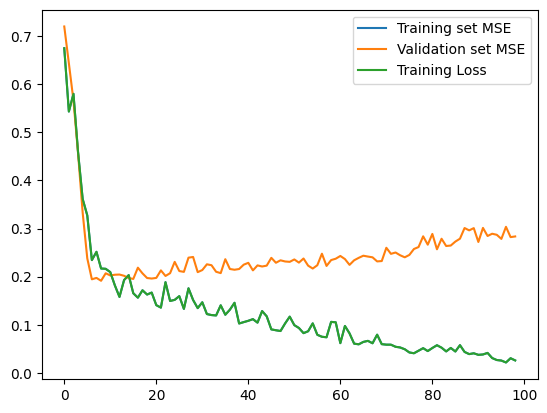

In [89]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(range(len(train_mse)), train_mse, label='Training set MSE')
plt.plot(range(len(val_mse)), val_mse, label='Validation set MSE')
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.legend()
plt.show()